* PROJETO - ANALISAR OS DADOS DAS CHAMADAS REALIZADAS PARA O 911

   Significado dos nomes das colunas da tabela:
   - lat = Latitude;
   - lng = Longitude;
   - desc = Descição do local/data;
   - zip = CEP;
   - title = Titulo da Ligação;
   - timeStamp = Data/Hora da Ligação;
   - twp = Município da Ligação;
   - addr = Endereço da Ligação;
   - e = Simulado? "0 = Não" "1 = Sim"

- Tratamento/Limpeza dos dados

In [44]:
#Importando as bibliotecas necessárias para o projeto
import pandas as pd
import matplotlib.pyplot as plt

# Definindo a visualização de todas as colunas no print
pd.set_option('display.max_columns', None)
# Embutindo os graficos no notebook, juntamente com o código
%matplotlib inline

In [45]:
# Carregando a base de dados
base_ligacoes = pd.read_csv('911.csv')

In [47]:
# Renomeando as colunas da planilha
base_ligacoes = base_ligacoes.rename(
    columns={'lat': 'Latitude', 'lng': 'Longitude', 'desc': 'LocalChamada', 'zip': 'CEP', 'title': 'SetorCausaChamada',
                         'timeStamp': 'DataHora', 'twp': 'Município', 'addr': 'Endereço', 'e':  'Simulado'})

In [48]:
# Verificando a quantidade de linhas e colunas da base de dados
base_ligacoes.shape

(99492, 9)

In [49]:
# Exibindo as 5 primeiras linhas da base de dados
base_ligacoes.head()

,Latitude,Longitude,LocalChamada,CEP,SetorCausaChamada,DataHora,Município,Endereço,Simulado
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [50]:
# Exibindo as 5 últimas linhas para verificar se existem valores totais no fim da planilha
base_ligacoes.tail()

,Latitude,Longitude,LocalChamada,CEP,SetorCausaChamada,DataHora,Município,Endereço,Simulado
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1
99491,40.207055,-75.317952,MORRIS RD & S BROAD ST; UPPER GWYNEDD; 2016-08...,19446.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:17:02,UPPER GWYNEDD,MORRIS RD & S BROAD ST,1


In [51]:
# Verificando a existência de linhas duplicados
base_ligacoes.duplicated().sum()

np.int64(0)

In [52]:
# Verficando se a coluna 'desc' possui espaços múltiplos (espaços desnecessários)
base_ligacoes['LocalChamada'].str.contains(r'\s{2,}', regex=True).sum()

np.int64(50900)

In [53]:
# Existem 50900 espaços desnecessários na coluna 'desc'.
    # Removendo os espaços desnecessários da coluna
base_ligacoes['LocalChamada'] = base_ligacoes['LocalChamada'].str.strip().str.replace(r'\s+', ' ', regex=True)

In [54]:
# Verificando as informações dos dados
base_ligacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Latitude           99492 non-null  float64
 1   Longitude          99492 non-null  float64
 2   LocalChamada       99492 non-null  object 
 3   CEP                86637 non-null  float64
 4   SetorCausaChamada  99492 non-null  object 
 5   DataHora           99492 non-null  object 
 6   Município          99449 non-null  object 
 7   Endereço           98973 non-null  object 
 8   Simulado           99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [55]:
# Verificando dados nulos nas colunas por ordem de grandeza quantitativa
base_ligacoes.isnull().sum().sort_values(ascending=False)

CEP                  12855
Endereço               519
Município               43
Latitude                 0
Longitude                0
SetorCausaChamada        0
LocalChamada             0
DataHora                 0
Simulado                 0
dtype: int64

In [56]:
# Formatando o visualização percentual para duas casas decimais
with pd.option_context("float_format", "{:.2%}".format):
    # Verificando os dados nulos nas colunas por ordem de grandeza percentual
    display(base_ligacoes.isnull().sum().sort_values(ascending=False) / base_ligacoes.shape[0])

CEP                 12.92%
Endereço             0.52%
Município            0.04%
Latitude             0.00%
Longitude            0.00%
SetorCausaChamada    0.00%
LocalChamada         0.00%
DataHora             0.00%
Simulado             0.00%
dtype: float64

In [57]:
# Analisando as estatísticas dos dados numéricos da base de dados
base_ligacoes.describe()

,Latitude,Longitude,CEP,Simulado
count,99492.000000,99492.000000,86637.000000,99492.0
mean,40.159526,-75.317464,19237.658298,1.0
std,0.094446,0.174826,345.344914,0.0
min,30.333596,-95.595595,17752.000000,1.0
25%,40.100423,-75.392104,19038.000000,1.0
50%,40.145223,-75.304667,19401.000000,1.0
75%,40.229008,-75.212513,19446.000000,1.0
max,41.167156,-74.995041,77316.000000,1.0


In [58]:
# Verificando o número de valores únicos de cada coluna
base_ligacoes.nunique()

Latitude             14579
Longitude            14586
LocalChamada         99455
CEP                    104
SetorCausaChamada      110
DataHora             72577
Município               68
Endereço             21914
Simulado                 1
dtype: int64

In [59]:
# Inserindo zero nos dados nulos da coluna "CEP"
base_ligacoes['CEP'] = base_ligacoes['CEP'].fillna(0.0)

In [60]:
# Inserindo a informação "NA" nos dados nulos das colunas "Município" e "Endereço"
base_ligacoes[['Município', 'Endereço']] = base_ligacoes[['Município', 'Endereço']].fillna('Não Informado')
base_ligacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Latitude           99492 non-null  float64
 1   Longitude          99492 non-null  float64
 2   LocalChamada       99492 non-null  object 
 3   CEP                99492 non-null  float64
 4   SetorCausaChamada  99492 non-null  object 
 5   DataHora           99492 non-null  object 
 6   Município          99492 non-null  object 
 7   Endereço           99492 non-null  object 
 8   Simulado           99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [61]:
base_ligacoes.head()

,Latitude,Longitude,LocalChamada,CEP,SetorCausaChamada,DataHora,Município,Endereço,Simulado
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station 3...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP;...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A; ...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; St...,0.0,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [62]:
# Criando as colunas 'Data Ligação' para serparar as datas das ligações da coluna 'Data/Hora'
base_ligacoes['DataLigação'] = base_ligacoes['DataHora'].apply(lambda x: x.split(' ')[0])
# Trandormando os dados da coluna "dtCall" de objeto para datetime
base_ligacoes['DataLigação'] = pd.to_datetime(base_ligacoes['DataLigação'])
# Criando uma coluna com os dias da semana
base_ligacoes['DiaSemana'] = base_ligacoes['DataLigação'].dt.day_name()

In [63]:
# Criando as colunas 'Inicio Chamada' para separar a hora inicial da ligação da coluna 'Local Chamada'
base_ligacoes['InicioChamada'] = base_ligacoes['LocalChamada'].str.extract(r'(\d{2}:\d{2}:\d{2})')
# Excluindo a coluna 'desc'
base_ligacoes.drop('LocalChamada', axis=1, inplace=True)

In [64]:
# Criando a coluna 'Termino Chamada' para separar a hora de encerramento da ligação da coluna 'Data/Hora'
base_ligacoes['TerminoChamada'] = base_ligacoes['DataHora'].apply(lambda x: x.split(' ')[1])
# Excluindo a coluna 'timeStamp' da planilha
base_ligacoes.drop('DataHora', axis=1, inplace=True)

In [65]:
# Criando uma nova coluna no DataFrame chamada 'Sigla Departamento' e 'Motivo Chamada', 
#  na qual cada valor é obtido a partir da coluna 'Setor/Causa Chamada' sendo dividida pelo caractere ':'
base_ligacoes['SiglaDepartamento'] = base_ligacoes['SetorCausaChamada'].apply(lambda x: x.split(':')[0])
base_ligacoes['MotivoChamada'] = base_ligacoes['SetorCausaChamada'].apply(lambda x: x.split(':')[1])
# Excluindo a coluna 'Setor/Causa Chamada' da planilha
base_ligacoes.drop('SetorCausaChamada', axis=1, inplace=True)

In [66]:
# Reconferindo os dados
base_ligacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Latitude           99492 non-null  float64       
 1   Longitude          99492 non-null  float64       
 2   CEP                99492 non-null  float64       
 3   Município          99492 non-null  object        
 4   Endereço           99492 non-null  object        
 5   Simulado           99492 non-null  int64         
 6   DataLigação        99492 non-null  datetime64[ns]
 7   DiaSemana          99492 non-null  object        
 8   InicioChamada      99489 non-null  object        
 9   TerminoChamada     99492 non-null  object        
 10  SiglaDepartamento  99492 non-null  object        
 11  MotivoChamada      99492 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(7)
memory usage: 9.1+ MB


In [67]:
# Excluindo oa colunas que não serão utilizadas nesse projeto
base_ligacoes.drop(['Simulado'], axis=1, inplace=True)

- Análise/Estatísticas dos Dados

In [68]:
# Exibindo os dados para conferir a criação das novas colunas, a formatação e a exclusão das colunas desnecessárias
base_ligacoes.head()

,Latitude,Longitude,CEP,Município,Endereço,DataLigação,DiaSemana,InicioChamada,TerminoChamada,SiglaDepartamento,MotivoChamada
0,40.297876,-75.581294,19525.0,NEW HANOVER,REINDEER CT & DEAD END,2015-12-10,Thursday,17:10:52,17:40:00,EMS,BACK PAINS/INJURY
1,40.258061,-75.264680,19446.0,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,2015-12-10,Thursday,17:29:21,17:40:00,EMS,DIABETIC EMERGENCY
2,40.121182,-75.351975,19401.0,NORRISTOWN,HAWS AVE,2015-12-10,Thursday,14:39:21,17:40:00,Fire,GAS-ODOR/LEAK
3,40.116153,-75.343513,19401.0,NORRISTOWN,AIRY ST & SWEDE ST,2015-12-10,Thursday,16:47:36,17:40:01,EMS,CARDIAC EMERGENCY
4,40.251492,-75.603350,0.0,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,2015-12-10,Thursday,16:56:52,17:40:01,EMS,DIZZINESS


In [69]:
# Ranking dos 5 maiores motivos das chamadas
    #Nesse momento, foi possível perceber que existem divergencias na formatação da coluna 'Motivo Chamada'
base_ligacoes['MotivoChamada'].value_counts().head()

MotivoChamada
VEHICLE ACCIDENT -       23066
DISABLED VEHICLE -        7702
VEHICLE ACCIDENT          5573
FIRE ALARM                5510
RESPIRATORY EMERGENCY     5112
Name: count, dtype: int64

In [70]:
# Corrigindo as diferenças de formatação na coluna 'Motivo Chamada'
base_ligacoes['MotivoChamada'] = base_ligacoes['MotivoChamada'].str.strip().str.replace(' -$', '',regex=True)

In [71]:
# Verificando a correção no Ranking dos 5 maiores motivos das chamadas
base_ligacoes['MotivoChamada'].value_counts().head()

MotivoChamada
VEHICLE ACCIDENT         28639
DISABLED VEHICLE          7703
FIRE ALARM                5510
RESPIRATORY EMERGENCY     5112
CARDIAC EMERGENCY         5012
Name: count, dtype: int64

In [72]:
# Ranking dos Departamentos mais acionados
    # EMS: Serviço de emergência médica
    # Traffic: Serviço de Tráfego
    # Fire: Incêndios
base_ligacoes['SiglaDepartamento'].value_counts().head()

SiglaDepartamento
EMS        48877
Traffic    35695
Fire       14920
Name: count, dtype: int64

<Axes: >

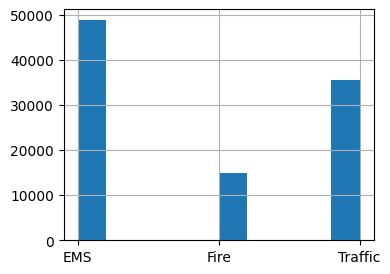

In [73]:
# Verificando os dados em um histograma simples
base_ligacoes.SiglaDepartamento.hist(figsize=(4,3))

In [74]:
# Ranking dos Municípios com maiores índices de ligações
base_ligacoes['Município'].value_counts().head()

Município
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: count, dtype: int64

In [75]:
# Entendendo qual município com os 5 tipos de chamadas são mais recorrentes
base_ligacoes.groupby('Município')['MotivoChamada'].value_counts().head()

Município  MotivoChamada        
ABINGTON   VEHICLE ACCIDENT         1541
           FIRE ALARM                490
           DISABLED VEHICLE          404
           RESPIRATORY EMERGENCY     337
           FALL VICTIM               307
Name: count, dtype: int64

In [76]:
# Ranking dos 5 dias com maiores índices de ligações
base_ligacoes['DataLigação'].value_counts().head()

DataLigação
2016-01-23    913
2016-02-24    679
2016-01-24    662
2016-01-12    588
2016-04-03    586
Name: count, dtype: int64

In [77]:
# Verificando os dias da semana com o maiores índices de ligações
base_ligacoes['DiaSemana'].value_counts().head()

DiaSemana
Tuesday      15150
Wednesday    14879
Friday       14833
Monday       14680
Thursday     14478
Name: count, dtype: int64

In [78]:
# Verificando o agrupamento de Dia da Semana e Sigla do Departamento com os 5 maiores motivos de ligações  
base_ligacoes.groupby(['DiaSemana', 'SiglaDepartamento',])['MotivoChamada'].value_counts().head()

DiaSemana  SiglaDepartamento  MotivoChamada        
Friday     EMS                RESPIRATORY EMERGENCY    751
                              CARDIAC EMERGENCY        727
                              FALL VICTIM              696
                              VEHICLE ACCIDENT         636
                              HEAD INJURY              380
Name: count, dtype: int64

In [79]:
# Verificando o agrupamento de Dia da Semana e Município com os 5 maiores motivos de ligações
base_ligacoes.groupby(['DiaSemana', 'Município'])['MotivoChamada'].value_counts().head()

DiaSemana  Município  MotivoChamada    
Friday     ABINGTON   VEHICLE ACCIDENT     235
                      DISABLED VEHICLE      75
                      FIRE ALARM            70
                      FALL VICTIM           49
                      CARDIAC EMERGENCY     45
Name: count, dtype: int64

In [80]:
# Verificando o agrupamento de Dia da Semana e os 5 Município com os maiores índices de ligações
base_ligacoes.groupby(['DiaSemana','Município'])['MotivoChamada'].count().head()

DiaSemana  Município   
Friday     ABINGTON        881
           AMBLER           86
           BERKS COUNTY     40
           BRIDGEPORT       63
           BRYN ATHYN       24
Name: MotivoChamada, dtype: int64

In [ ]:
# Convertendo os dados tratados para um arquivo csv
base_ligacoes.to_csv('resultado911.csv', index=False, encoding='utf-8')

- Visualização dos Dados

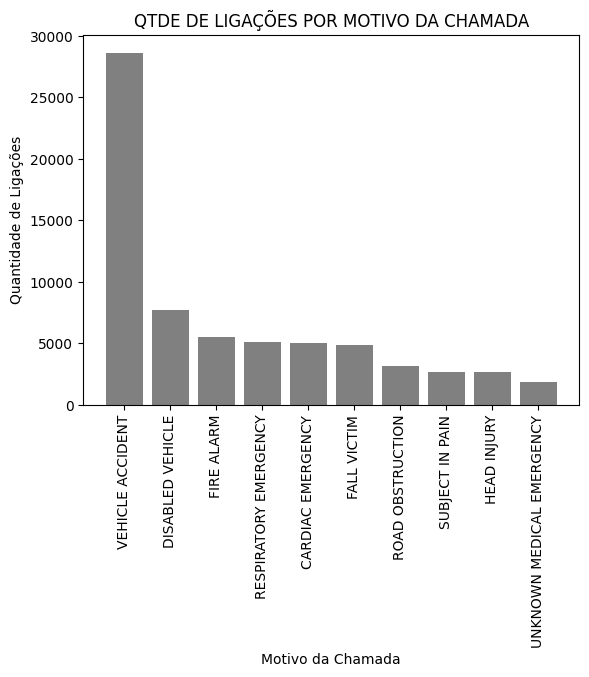

In [82]:
fig, ax = plt.subplots(ncols=1,nrows=1)

#Dados
dez_municipios = base_ligacoes['Município'].value_counts().head(10)
dez_motivos = base_ligacoes['MotivoChamada'].value_counts().head(10)

ax.bar(range(len(dez_motivos)), dez_motivos, color="grey")
ax.set_xticks(range(len(dez_motivos)))
ax.set_xticklabels(dez_motivos.index, rotation=90)
plt.title("QTDE DE LIGAÇÕES POR MOTIVO DA CHAMADA")
plt.xlabel("Motivo da Chamada")
plt.ylabel("Quantidade de Ligações")

plt.show()

Nesse momento é possível perceber que o maior índice de chamadas ocorreram por acidente de veículos.